In [ ]:
# given N rolls what is probability of getting 3 in a row
from fractions import Fraction
from functools import cache
from itertools import combinations_with_replacement
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

# use bit-mask for dp state.
# need to determine which states are winning
# state of dp will be (board, num_rolls_left)


# if we roll x, that will be board state
#  3 4 5 6 7 8 9 10 11 (9 bits of info here)
# say dice are 0-5

# ================== Create mask of winning states ======================

# Base winning states for a 3 x 3 board
base = 0
win_states = set()
for k in range(1, 4):
    cur = 0
    for i in range(3):
        cur |= 1 << (3 * k + i)
    win_states.add(cur)

    cur = 0
    for i in range(3):
        cur |= 1 << (2 + k + 3 * i)
    win_states.add(cur)
win_states.add((1 << 3) | (1 << 7) | (1 << 11))
win_states.add((1 << 5) | (1 << 7) | (1 << 9))

# now we can augment the winning states, for up to 12 dice. This is not optimized.
n_states = set()
for state in win_states:
    for b_vect in combinations_with_replacement(list(range(3, 12)), 9):
        c_state = state
        for b in b_vect:
            c_state |= 1 << b
        n_states.add(c_state)
    win_states = win_states | n_states


# Helper for sanity checking the mask
def mask_to_board(mask):
    bits = []
    for i in range(1, 12):
        if mask & (1 << i):
            bits.append(i)
    return bits


# Sanity check our mask to the winning states
# for state in win_states:
#     print(state, mask_to_board(state))


# ========= Solution Driver: DP on state and dice left =========
num_dice = 2


@cache
def prob_roll(x, rolls):
    if not rolls <= x <= 6 * rolls:
        return 0
    elif rolls == 1:
        return Fraction(1, 6)
    else:
        return Fraction(1, 6) * sum(prob_roll(x - r, rolls - 1) for r in range(1, 7))


@cache
def solve(state, rolls_left):
    if state in win_states:
        return 1
    elif rolls_left == 0:
        return 0
    else:
        prob = Fraction(2, 36) * solve(state, rolls_left - 1)
        for roll in range(3, 12):
            p_roll = prob_roll(roll, num_dice)
            n_state = state | (1 << roll)
            prob += p_roll * solve(n_state, rolls_left - 1)
        return prob


# ===== Compute Solution for various number of allowed rolls =======
rolls = 5
state0 = 0
for rolls in range(3, 10):
    solu = solve(state0, rolls)
    print(f"Probability of winning with {rolls = } is: {solu} which is ~ {solu:.4f}")

Probability of winning with rolls = 3 is: 113/1944 which is ~ 0.0581
Probability of winning with rolls = 4 is: 3325/17496 which is ~ 0.1900
Probability of winning with rolls = 5 is: 910405/2519424 which is ~ 0.3614
Probability of winning with rolls = 6 is: 23929075/45349632 which is ~ 0.5277
Probability of winning with rolls = 7 is: 80482969/120932352 which is ~ 0.6655
Probability of winning with rolls = 8 is: 1256747485/1632586752 which is ~ 0.7698
Probability of winning with rolls = 9 is: 3573073000505/4231664861184 which is ~ 0.8444


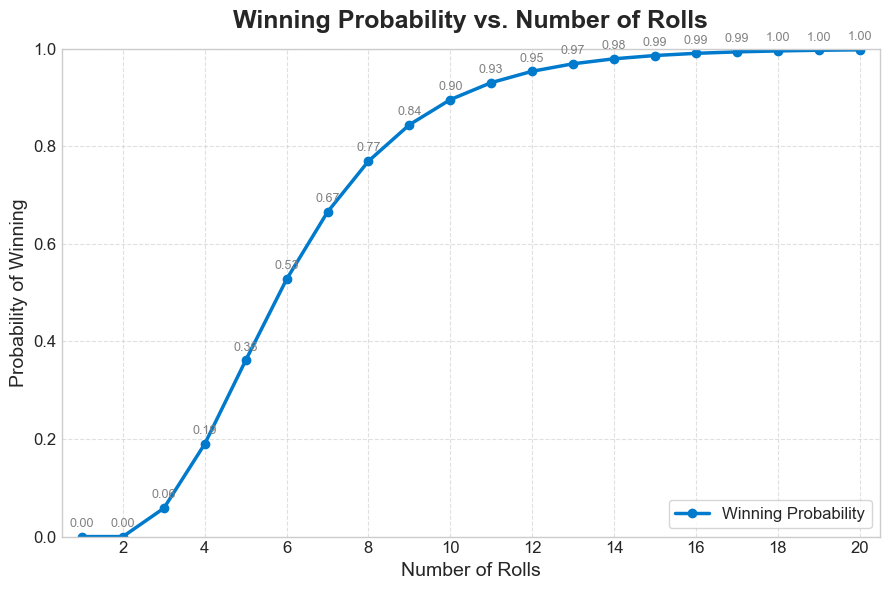

In [89]:
# ====== Plot the probability of winning as a function of rolls =============
#   * Figure made with help from Chat-GPT. Solution is my own.

rolls = list(range(1, 21))
win_probs = [solve(state0, num_rolls) for num_rolls in rolls]

# Plot
plt.figure(figsize=(9, 6))
plt.plot(
    rolls,
    win_probs,
    marker="o",
    markersize=6,
    linewidth=2.5,
    color="#007ACC",
    label="Winning Probability",
)

# Titles and labels
plt.title("Winning Probability vs. Number of Rolls", fontsize=18, pad=15, weight="bold")
plt.xlabel("Number of Rolls", fontsize=14)
plt.ylabel("Probability of Winning", fontsize=14)

# Grid and axis style
plt.grid(True, which="both", linestyle="--", linewidth=0.8, alpha=0.6)
plt.xticks(
    fontsize=12,
)
# Ensure integeral ticks.
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.yticks(fontsize=12)
plt.xlim(min(rolls) - 0.5, max(rolls) + 0.5)
plt.ylim(0, 1)  # assuming probabilities

# Optional: Add data labels
for x, y in zip(rolls, win_probs):
    plt.text(x, y + 0.02, f"{y:.2f}", ha="center", fontsize=9, color="gray")

# Legend and layout
plt.legend(fontsize=12, loc="lower right", frameon=True)
plt.tight_layout()

# Optional: use a subtle style
plt.style.use("seaborn-v0_8-whitegrid")

plt.show()